In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#    - City, country, and date
#    - Latitude and longitude
#    - Maximum temperature
#    - Humidity
#    - Cloudiness
#    - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3974a24374277450bf992714ddfd803


In [9]:
# Import the time library and the datetime module from the datetime library.

import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | lasa
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | mitu
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | north myrtle beach
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | miles city
Processing Record 16 of Set 1 | puri
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1

Processing Record 34 of Set 4 | nkoteng
Processing Record 35 of Set 4 | danville
Processing Record 36 of Set 4 | menongue
Processing Record 37 of Set 4 | kashi
Processing Record 38 of Set 4 | los llanos de aridane
Processing Record 39 of Set 4 | kapoeta
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | pokhara
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | bloemfontein
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | kuche
City not found. Skipping...
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | fort nelson
Processing Record 49 of Set 4 | maracacume
Processing Record 50 of Set 4 | nishihara
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | soyo
Processing Record 3 of Set 5 | vire
Processing Record 4 of Set 5 | beloha
Processing Record 5 of Set 5 | lienz
Processing Record 6 of Set 5 | rennes
Processing Record 7 of Set 5 | arm

Processing Record 25 of Set 8 | luwuk
Processing Record 26 of Set 8 | sandovo
Processing Record 27 of Set 8 | mazzarino
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | charlestown
Processing Record 30 of Set 8 | pedasi
Processing Record 31 of Set 8 | kachug
Processing Record 32 of Set 8 | haines junction
Processing Record 33 of Set 8 | benguela
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | puerto narino
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | garden city
Processing Record 39 of Set 8 | raudeberg
Processing Record 40 of Set 8 | beaverlodge
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 45 of Set 8 | bengkulu
Processing Record 46 of Set 8 | afanasyevo
City not found. Skipping...
Processing 

Processing Record 10 of Set 12 | manta
Processing Record 11 of Set 12 | meadow lake
Processing Record 12 of Set 12 | hamilton
Processing Record 13 of Set 12 | hokitika
Processing Record 14 of Set 12 | zhovtneve
Processing Record 15 of Set 12 | victoria point
Processing Record 16 of Set 12 | pipri
Processing Record 17 of Set 12 | peniche
Processing Record 18 of Set 12 | smithers
Processing Record 19 of Set 12 | dingle
Processing Record 20 of Set 12 | dzerzhinskoye
Processing Record 21 of Set 12 | nieuw amsterdam
Processing Record 22 of Set 12 | hobyo
Processing Record 23 of Set 12 | diffa
Processing Record 24 of Set 12 | naravarikuppam
Processing Record 25 of Set 12 | ugoofaaru
Processing Record 26 of Set 12 | columbia
Processing Record 27 of Set 12 | huanren
Processing Record 28 of Set 12 | mikkeli
Processing Record 29 of Set 12 | yaring
Processing Record 30 of Set 12 | yialos
City not found. Skipping...
Processing Record 31 of Set 12 | caborca
Processing Record 32 of Set 12 | buala
Pr

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,82.36,84,49,7.16,EC,2022-05-04 22:35:41
1,Lasa,46.6166,10.7002,49.08,92,89,1.41,IT,2022-05-04 22:37:39
2,Hilo,19.7297,-155.0900,82.27,88,75,10.36,US,2022-05-04 22:36:54
3,Mataura,-46.1927,168.8643,53.47,60,24,2.89,NZ,2022-05-04 22:34:01
4,Punta Arenas,-53.1500,-70.9167,42.91,75,40,14.97,CL,2022-05-04 22:37:40
5,Bluff,-46.6000,168.3333,53.80,72,39,7.43,NZ,2022-05-04 22:37:40
6,Mitu,1.1983,-70.1733,74.28,96,97,1.23,CO,2022-05-04 22:37:40
7,Busselton,-33.6500,115.3333,51.85,64,0,13.31,AU,2022-05-04 22:34:07
8,Albany,42.6001,-73.9662,56.39,86,100,4.09,US,2022-05-04 22:37:13
9,North Myrtle Beach,33.8160,-78.6800,80.71,75,0,12.66,US,2022-05-04 22:37:41


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-05-04 22:35:41,-0.7393,-90.3518,82.36,84,49,7.16
1,Lasa,IT,2022-05-04 22:37:39,46.6166,10.7002,49.08,92,89,1.41
2,Hilo,US,2022-05-04 22:36:54,19.7297,-155.0900,82.27,88,75,10.36
3,Mataura,NZ,2022-05-04 22:34:01,-46.1927,168.8643,53.47,60,24,2.89
4,Punta Arenas,CL,2022-05-04 22:37:40,-53.1500,-70.9167,42.91,75,40,14.97
5,Bluff,NZ,2022-05-04 22:37:40,-46.6000,168.3333,53.80,72,39,7.43
6,Mitu,CO,2022-05-04 22:37:40,1.1983,-70.1733,74.28,96,97,1.23
7,Busselton,AU,2022-05-04 22:34:07,-33.6500,115.3333,51.85,64,0,13.31
8,Albany,US,2022-05-04 22:37:13,42.6001,-73.9662,56.39,86,100,4.09
9,North Myrtle Beach,US,2022-05-04 22:37:41,33.8160,-78.6800,80.71,75,0,12.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/04/22'

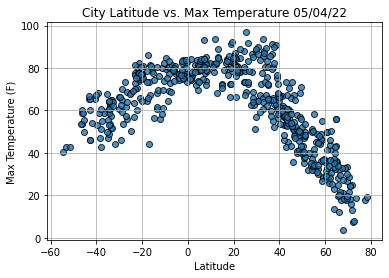

In [17]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

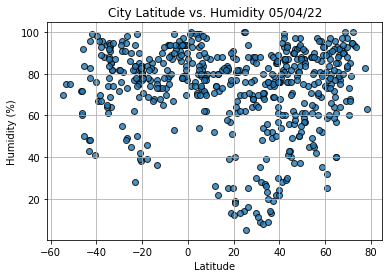

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

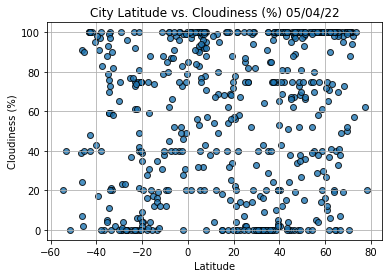

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

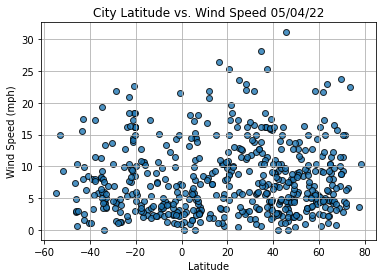

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                   Miles City
Country                        US
Date          2022-05-04 22:37:42
Lat                       46.4083
Lng                     -105.8406
Max Temp                    67.17
Humidity                       37
Cloudiness                      0
Wind Speed                    0.0
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
529     True
530     True
531    False
532     True
533     True
Name: Lat, Length: 534, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lasa,IT,2022-05-04 22:37:39,46.6166,10.7002,49.08,92,89,1.41
2,Hilo,US,2022-05-04 22:36:54,19.7297,-155.0900,82.27,88,75,10.36
6,Mitu,CO,2022-05-04 22:37:40,1.1983,-70.1733,74.28,96,97,1.23
8,Albany,US,2022-05-04 22:37:13,42.6001,-73.9662,56.39,86,100,4.09
9,North Myrtle Beach,US,2022-05-04 22:37:41,33.8160,-78.6800,80.71,75,0,12.66


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

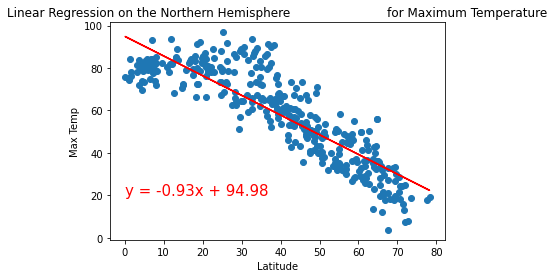

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,20))

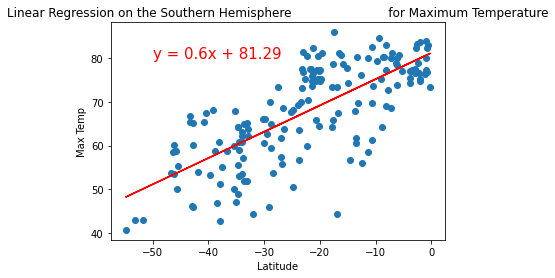

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

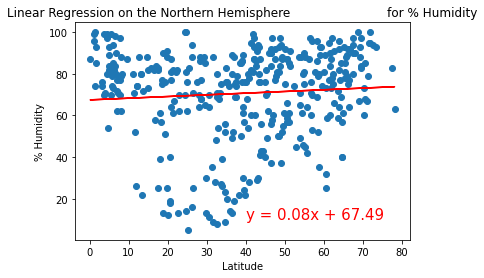

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

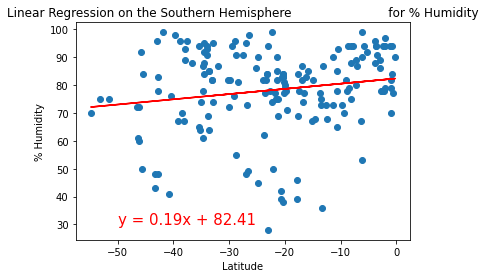

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

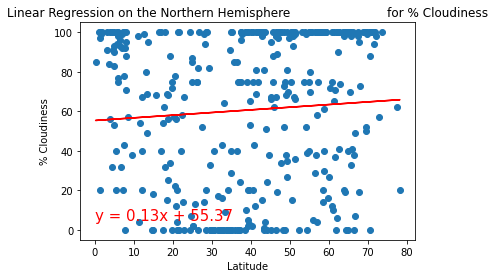

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,5))

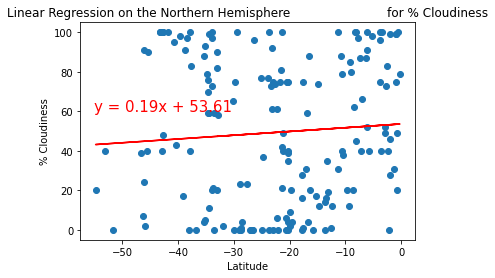

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

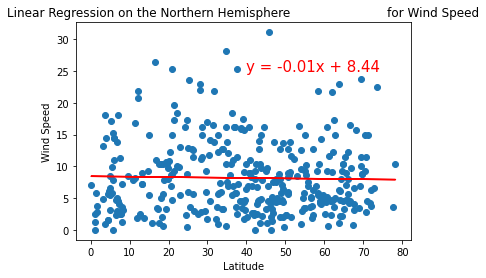

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

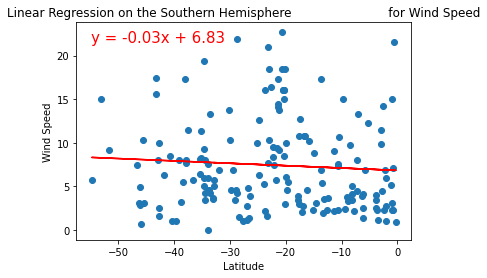

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,21.5))